# 3.2 聚类分析
### 3.2.1 系统聚类法
包括最短距离法、最长距离法、中间距离法（又称Mcquity相似法）、类平均法、重心法、离差平方和法（Ward方法）等各种方法

In [61]:
import numpy as np
import pandas as pd
import scipy.cluster as sc
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
    
df = pd.read_csv(r'./CBM.csv',header=0)
df.head()

,FID,Well,Depth,Romax,Thick,Mad,Aad,Vad,Gas,CH4,CO2,N2
0,0,M-15,693.2,1.37,2.75,0.86,7.53,22.37,8.23,95.15,0.66,4.19
1,1,M-32,764.8,1.43,2.94,0.71,6.79,21.37,11.84,96.54,1.06,2.40
2,2,M-37,681.2,1.29,4.16,0.64,7.41,24.09,9.18,96.20,0.57,1.00
3,3,M-47,680.6,1.21,2.40,0.68,7.95,25.79,6.07,92.24,1.30,5.56
4,4,M-55,648.5,1.29,2.54,0.70,7.94,24.14,5.96,87.51,1.44,7.87


In [64]:
# 丢弃无用列，使用井名称重建索引
X = df.drop(['FID','Well','CH4','CO2','N2','Depth'],axis=1)
X.index = df['Well']
X.head(2)

,Romax,Thick,Mad,Aad,Vad,Gas
Well,,,,,,
M-15,1.37,2.75,0.86,7.53,22.37,8.23
M-32,1.43,2.94,0.71,6.79,21.37,11.84


In [74]:
# 数据标准化
X_std = (X - np.mean(X,axis=0))/st.tstd(X,axis=0)#注意这里要使用标准差的无偏估计
print(X_std)

# 计算距离
dis =dist.pdist(X_std,'euclidean')

          Romax     Thick       Mad       Aad       Vad       Gas
Well                                                             
M-15  -0.860959  0.738178  0.889789 -0.953789  0.796565  0.273206
M-32  -0.446317  0.946346  0.074715 -1.018354  0.416419  1.817272
M-37  -1.413816  2.283009 -0.305653 -0.964259  1.450417  0.679539
M-47  -1.966672  0.354709 -0.088300 -0.917143  2.096667 -0.650668
M-55  -1.413816  0.508096  0.020377 -0.918016  1.469425 -0.697717
M-149  1.212253 -0.412229  1.650524 -0.966004 -1.180197 -0.646391
M-169 -0.860959 -1.069604  0.781112  0.939538  0.861190 -0.359819
M-193 -1.137387 -0.960042 -0.088300  1.516261  1.157705 -1.292247
M-215  0.590290  0.245146  0.509421  0.908128 -0.613778  0.132058
M-227  1.419575 -0.631354  1.759201  1.624451 -1.374071 -0.599342
T-7   -0.100781 -0.039716 -0.957712 -0.347401  0.047677  0.157721
T-15  -0.031674 -1.069604 -0.523006 -0.750496  0.009662  0.307423
T-17  -0.791852 -0.631354  1.161480  0.263350  0.758551 -0.791815
T-19   0.8

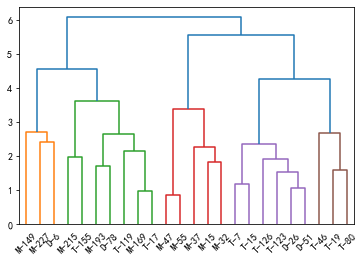

In [73]:
# 使用最远距离法进行聚类
Z =sc.hierarchy.linkage(dis,'complete')
row_dendr=sc.hierarchy.dendrogram(Z,labels=X.index)

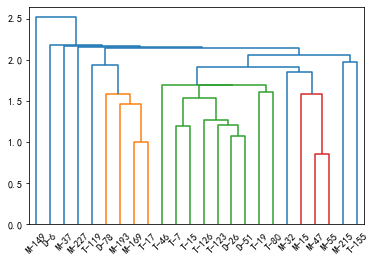

In [72]:
# 使用欧式距离的最短距离法（最近邻法）聚类
row_clusters = sc.hierarchy.linkage(dist.pdist(X_std,metric='euclidean'),method='single')
row_dendr = sc.hierarchy.dendrogram(row_clusters,labels=X.index)

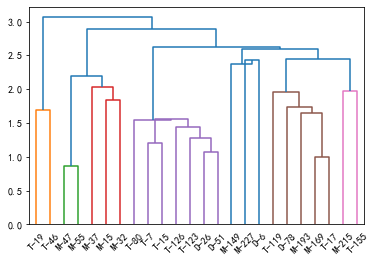

In [70]:
# 使用欧式距离的质心法聚类
row_clusters = sc.hierarchy.linkage(dist.pdist(X_std,metric='euclidean'),method='centroid')
row_dendr = sc.hierarchy.dendrogram(row_clusters,labels=X.index)

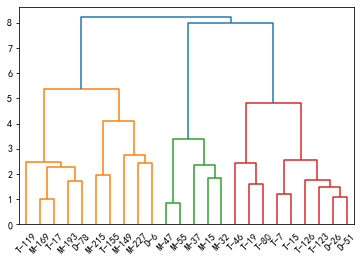

In [71]:
# 使用离差平方和增量法聚类
row_clusters = sc.hierarchy.linkage(dist.pdist(X_std,metric='euclidean'),method='ward')
row_dendr = sc.hierarchy.dendrogram(row_clusters,labels=X.index)